In [1]:
import matplotlib.pyplot as plt
import random 
import math 
import pandas as pd

In [2]:
df=pd.read_csv('1st exp.csv')
df.head()

,X1,X2,Y
0,69,3,0
1,18,75,1
2,95,92,0
3,50,22,0
4,25,12,1


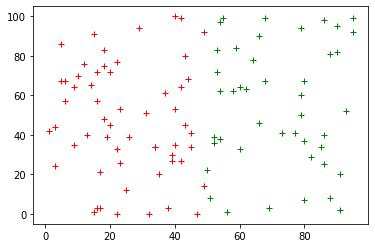

In [3]:
X1 = df["X1"].values.tolist()
X2 = df["X2"].values.tolist()
Y = df["Y"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "g+")
    else:
        plt.plot(X1[i], X2[i], "r+")

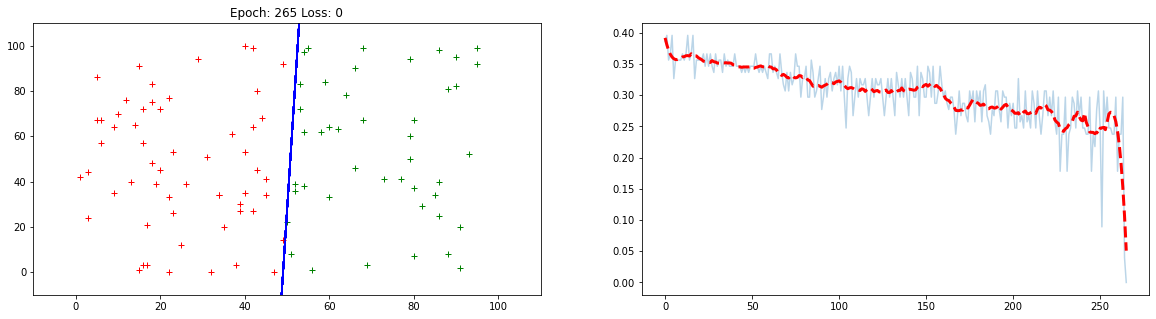

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display
from scipy.signal import savgol_filter


W = [random.random(), random.random()]
b = random.random()

lr = 1
theta=0.5

epoch = 0
count = 0


loss = []

while count < len(X1):
    
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = W[0]*X1[i] + W[1]*X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error =  Y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error
        else:
            count += 1
    
    loss.append(1/len(X1)*total_error)
    
    plt.figure(figsize=(20,5)) 
    display.clear_output(wait=True)
    plt.subplot(1,2,1)

    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "g+")
        else:
            plt.plot(X1[i], X2[i], "r+")

        plt.xlim([-10, 110])
        plt.ylim([-10, 110])

        xintr=(theta-b)/W[0]
        yintr=(theta-b)/W[1]

        slope = -yintr/xintr
        xx = plt.xlim()
        yeq = []
        for x in xx:
            yeq.append(slope*x+yintr)
        plt.plot(xx,yeq, 'b-')

    plt.title(f"Epoch: {epoch} Loss: {total_error}")

    plt.subplot(1,2,2)
    plt.plot(loss, alpha=0.3)
    if epoch > 20:
        yhat = savgol_filter(loss, 21, 3) 
        plt.plot(yhat, 'r--', lw=3)

    plt.show()
    epoch += 1

In [1]:
import matplotlib.pyplot as plt
import random 
import math 
import pandas as pd

In [2]:
df=pd.read_csv('1st exp.csv')
df.head()

,X1,X2,Y,Y2
0,69,3,,1
1,18,75,1,1
2,95,92,0,0
3,50,22,0,1
4,25,12,1,1


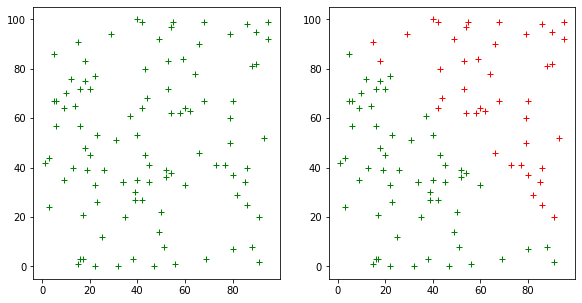

In [4]:
X1 = df["X1"].values.tolist()
X2 = df["X2"].values.tolist()
Y = df["Y"].values.tolist()
Y2 =df["Y2"].values.tolist()

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "g+")
        
plt.subplot(1,3,2)
for i in range(len(Y2)):
    if Y2[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "g+")

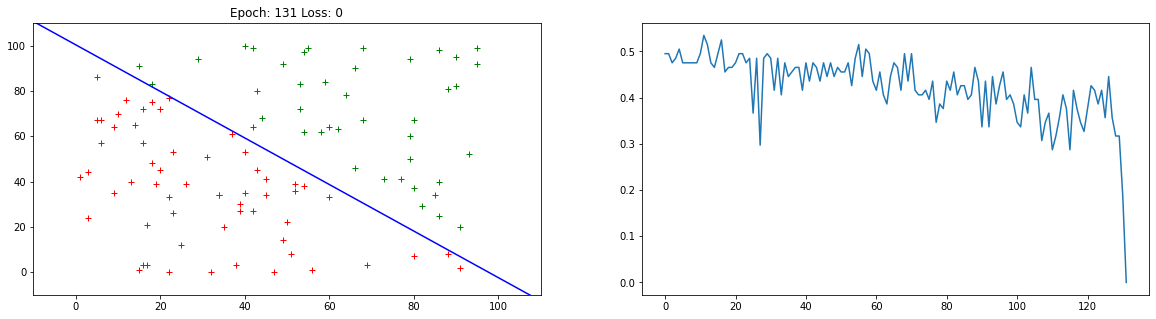

Epoch: 131 Loss: 0.0


In [8]:
import matplotlib.pyplot as plt
import numpy as np 
import random
import math
from IPython import display
from scipy.signal import savgol_filter

W = [random.random(), random.random()]
b= random.random()

lr = 1
theta = 0.5
epoch = 0
count = 0

loss = []

while count <len(X1):
    total_error = 0
    for i in range(len(Y2)):
        weighted_sum = W[0]*X1[i] +W[1]*X2[i] +b

        pred = 0
        if weighted_sum>theta:
            pred= 1

        error = Y2[i]-pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            W[0] = W[0]+ error*X1[i]*lr
            W[1] += error*X2[i]*lr
            b    += error*lr
        else:
            count +=1
        
    loss.append(1/len(X1)*total_error)
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)# 2row 2column index_value
    display.clear_output(wait= True) 
    for i in range(len(Y2)):
        if Y2[i] == 0:
            plt.plot(X1[i], X2[i], "g+")
        else:
            plt.plot(X1[i], X2[i], "r+")
        
        plt.xlim([-10, 110])
        plt.ylim([-10, 110])

        xintr = (theta-b)/W[0]
        yintr = (theta-b)/W[1]

        slope = -yintr/xintr

        xx =plt.xlim()
    yy= []
    for x in xx:
        yy.append(slope*x+yintr)
    plt.plot(xx,yy,'b')

    plt.title(f"Epoch: {epoch} Loss: {total_error}")
    plt.subplot(1,2,2) #multiple figure(1roe 2column index_value)
    plt.plot(loss)
    plt.show()
    print(f"Epoch: {epoch} Loss: {loss[-1]}")
    epoch +=1
    